使用するモジュールのimport

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
from pandas import DataFrame
from scipy import optimize

ModuleNotFoundError: No module named 'japanize_matplotlib'

In [7]:
# カレントディレクトリの変更（自分の作業フォルダのパスを設定）
# os.chdir('/Users/narizuka/GoogleDrive/My Drive/document/講義/立正/情報処理の応用/')
os.chdir(r"G:\マイドライブ\document\講義\立正\情報処理の応用")

In [4]:
pd.set_option('max_rows', 20)  # 表示する行数
pd.set_option('precision', 4)  # 小数点以下の表示桁
np.set_printoptions(suppress=True, precision=4)
%precision 4  # 小数点以下の表示桁

'%r'

google colab を使う際のセッティング

In [ ]:
# matplotlibで日本語表示
!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib

In [ ]:
# google driveをマウントする
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# カレントディレクトリを変更（自分の作業フォルダのパスを設定）
os.chdir('/content/drive/My Drive/document/講義/立正/情報処理の応用/')

jupyter lab のcssスタイルを変更（必要な場合だけ）

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.jp-Cell { width:100% !important; margin: 0 auto; }</style>"))
with open('./material/variables.css') as f: 
    css = f.read().replace(';', ' !important;')
display(HTML('<style type="text/css">%s</style>'%css))

# 回帰直線と最小二乗法

### データの作成

In [15]:
np.random.seed(1234)
x_data = np.linspace(-10, 10, num=100)
y_data = 2*x_data + 5 + 5.*np.random.randn(x_data.size)
np.savetxt('material\sec_2-4\data_lsm.csv', np.c_[x_data, y_data], fmt='%.2f', delimiter=',')

In [6]:
x_data

array([-10.    ,  -9.798 ,  -9.596 ,  -9.3939,  -9.1919,  -8.9899,
        -8.7879,  -8.5859,  -8.3838,  -8.1818,  -7.9798,  -7.7778,
        -7.5758,  -7.3737,  -7.1717,  -6.9697,  -6.7677,  -6.5657,
        -6.3636,  -6.1616,  -5.9596,  -5.7576,  -5.5556,  -5.3535,
        -5.1515,  -4.9495,  -4.7475,  -4.5455,  -4.3434,  -4.1414,
        -3.9394,  -3.7374,  -3.5354,  -3.3333,  -3.1313,  -2.9293,
        -2.7273,  -2.5253,  -2.3232,  -2.1212,  -1.9192,  -1.7172,
        -1.5152,  -1.3131,  -1.1111,  -0.9091,  -0.7071,  -0.5051,
        -0.303 ,  -0.101 ,   0.101 ,   0.303 ,   0.5051,   0.7071,
         0.9091,   1.1111,   1.3131,   1.5152,   1.7172,   1.9192,
         2.1212,   2.3232,   2.5253,   2.7273,   2.9293,   3.1313,
         3.3333,   3.5354,   3.7374,   3.9394,   4.1414,   4.3434,
         4.5455,   4.7475,   4.9495,   5.1515,   5.3535,   5.5556,
         5.7576,   5.9596,   6.1616,   6.3636,   6.5657,   6.7677,
         6.9697,   7.1717,   7.3737,   7.5758,   7.7778,   7.9

In [7]:
y_data

array([-12.6428, -20.5508,  -7.0284, -15.3511, -16.9868,  -8.544 ,
        -8.2778, -15.3543, -11.6892, -22.5771,  -5.2094,  -5.5958,
        -5.3849, -19.8537, -11.0138,  -8.9288,  -6.5081,  -6.6859,
        -1.1215, -15.0578,  -7.9324,  -9.795 ,  -5.144 ,  -2.9399,
         1.2877,  -7.2455,  -1.1172, -13.176 ,  -4.6024,   2.012 ,
        -4.868 ,  -0.7876,   3.1672,   3.563 ,   3.056 ,  -1.469 ,
         0.169 ,  -1.6645,   4.5619,  12.7124,   1.5426,  -1.2666,
         2.1504,  -8.0012,   4.0167,  -1.304 ,   2.9019,   4.0813,
         8.171 ,   5.8743,   9.4071,  -1.623 ,  -0.9998,   5.9096,
         4.077 ,   6.4991,   9.3964,   7.8527,  11.263 ,  16.5667,
         4.3712,   9.2947,  11.5903,   9.4121,  16.0276,  -0.7396,
        21.8197,   6.3576,  13.5342,  16.4024,   9.3557,  15.9972,
        17.6121,  17.1125,  10.2677,  25.3422,  16.8419,  10.3478,
        19.675 ,  17.1168,  19.6452,  -0.0903,  24.7368,  19.2985,
        19.762 ,  17.193 ,  23.5843,  25.0761,  21.9097,  27.9

### 最小二乗法

In [8]:
# scipy.optimize.curve_fit
def fit_func(x, a, b):
    return a*x + b

p = optimize.curve_fit(fit_func, x_data, y_data)[0]
p

array([1.9828, 5.1756])

In [9]:
# scipy.optimize.leastsq
def func(p, x, y):
    residual = y - (p[0]*x + p[1])
    return residual
 
p0 = [0, 0]
p = optimize.leastsq(func, p0, args=(x_data, y_data))[0]
p

array([1.9828, 5.1756])

In [10]:
# 公式から
nume = np.sum(x_data * y_data) - np.sum(x_data) * np.sum(y_data) / x_data.size
denom = np.sum(x_data**2) - (np.sum(x_data)**2)/x_data.size
a = nume / denom
b = np.mean(y_data - a*x_data)
(a, b)

(1.9827762695911915, 5.1755614156271825)

### 決定係数

In [11]:
R2 = np.var(fit_func(x_data, p[0], p[1])) / np.var(y_data)
R2

0.8436624304844442

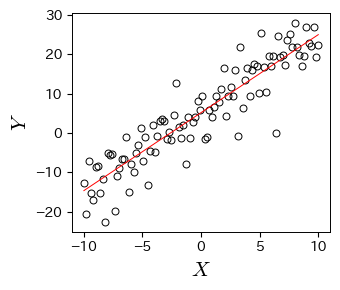

In [18]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data, 'o', mfc='None')
ax.plot(x_data, fit_func(x_data, p[0], p[1]), 'r-', mfc='None')
ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('$Y$', fontsize=15)
fig.savefig('figure/lsm_ex.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

# 実例：都市の平均気温と緯度の関係

## STEP1: Problem
- 地球上では，赤道付近は暑く，極地に近づくほど寒くなる．
- 世界の様々な地域の年間平均気温がどのように決まっているのだろうか？

## STEP2: Plan
- 世界の各地域で年間平均気温は異なっている．
- 各地域での年間平均気温に影響を与える要因は，各地域の地球上での位置，都市の自然環境，人間活動などが考えられる．
- 以下では，各都市の地球上での位置に関するデータを収集し，年間平均気温との関係を探る．

## STEP3: Data 
- 理科年表から得られた各都市の年間平均気温，緯度，標高のデータを用いる

In [12]:
D = pd.read_csv('material/sec_2-4/data_25city.csv')

In [13]:
# 絶対緯度
D['L2'] = D['L'].abs()

## STEP4: Analysis

### 散布図
- まず，相関関係を視覚的に確認するために散布図を調べることにする．
- 散布図を見ると，平均気温は緯度に対して上に凸の2次関数のような関係となり，かつ赤道（0度）に対して左右対称になっていることが分かる．
- 一方，標高と平均気温については特定の関数関係はない．
- このように，散布図がそもそも直線関係となっていない場合には，相関係数を求めるのは不適切である．

Text(0, 0.5, '平均気温（℃）')

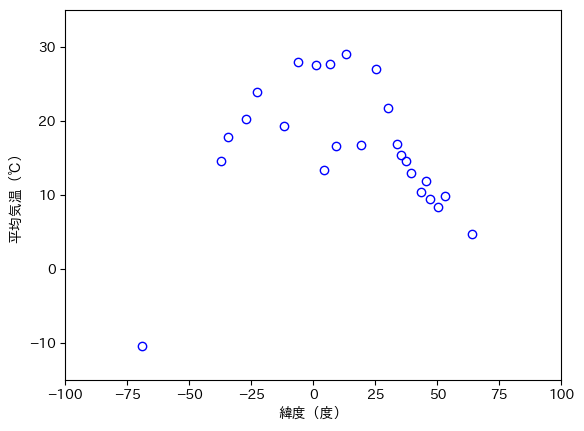

In [14]:
# 緯度と平均気温の散布図
fig, ax = plt.subplots()
ax.plot(D['L'], D['T'], 'bo', mfc='None')
ax.set_xlim(-100, 100); ax.set_ylim(-15, 35)
ax.set_xlabel('緯度（度）')
ax.set_ylabel('平均気温（℃）')
# fig.savefig('figure/lat_temp.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

Text(0, 0.5, '平均気温（℃）')

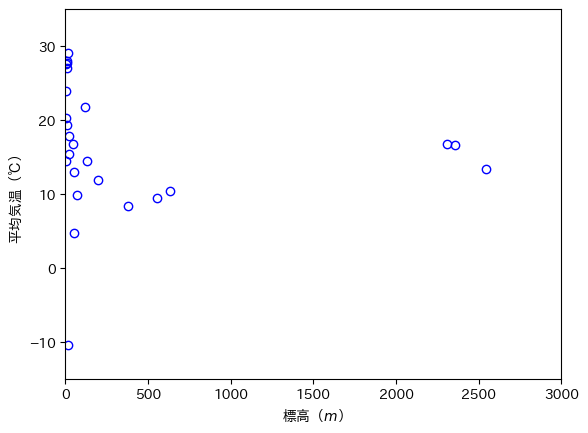

In [15]:
# 標高と平均気温の散布図
fig, ax = plt.subplots()
ax.plot(D['Z'], D['T'], 'bo', mfc='None')
ax.set_xlim(0, 3000); ax.set_ylim(-15, 35)
ax.set_xlabel('標高（$m$）')
ax.set_ylabel('平均気温（℃）')
# fig.savefig('figure/alt_temp.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

### 緯度と平均気温の関数関係
- 緯度と平均気温の関数関係を特定すれば，散布図が直線関係を示すような適切な変数変換を導ける．
- そこで，緯度の値別に複数のグループに分け，グループ内で平均気温，平均緯度などを求めて関係を調べることにする．
- ここでは25都市を緯度の絶対値の昇順に5都市ずつのグループに分ける：
    - 群1：シンガポール，ボコタ，ジャカルタ，コロンボ，アジスアベバ
    - 群2：リマ，チェンマイ，メキシコ，リオデジャネイロ，ドーハ
    - 群3：ブリスベン，カイロ，ケープタウン，ブエノスアイレス，東京
    - 群4：サンフランシスコ，メルボルン，北京，サラエボ，リオン
    - 群5：チューリッヒ，プラハ，ダブリン，レイキャビク，昭和基地

#### 実習
- 各群に対し，絶対緯度の平均，平均気温の平均，平均気温の標準偏差を求めよ
- 平均絶対緯度を横軸，平均気温の平均を縦軸に取った図をエラーバー付きで描け

In [16]:
# 群ごとの集計
D2 = D.groupby('group').mean()  # groupごとの平均
y_err = D.groupby('group').std()['T']  # groupごとの標準偏差

Text(0, 0.5, '平均気温（℃）')

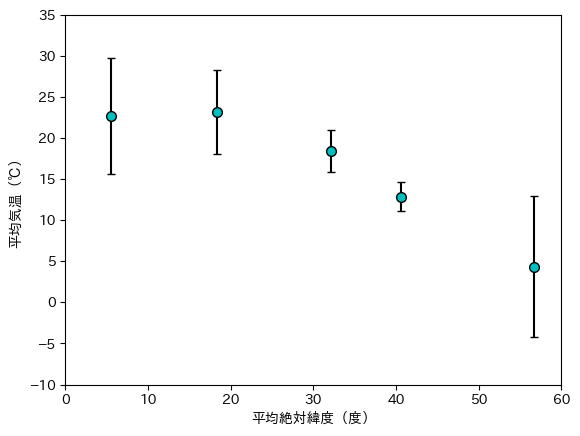

In [17]:
# 平均絶対緯度と平均気温の平均
fig, ax = plt.subplots()
ax.errorbar(D2['L2'], D2['T'], yerr= y_err,\
            capsize=3, fmt='co', markersize=7, ecolor='k', markeredgecolor='k', color='w')
ax.set_xlim(0, 60); ax.set_ylim(-10, 35)
ax.set_xlabel('平均絶対緯度（度）')
ax.set_ylabel('平均気温（℃）')
# fig.savefig('figure/ave_latitude_temp.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

#### 実習
- 横軸に絶対緯度の２乗，縦軸に平均気温を取った散布図を描け
- この散布図に対して，最小二乗法で回帰直線を求めよ
- この散布図に対して，相関係数を求めよ

[-0.0061 24.0986]


Text(0, 0.5, '平均気温（℃）')

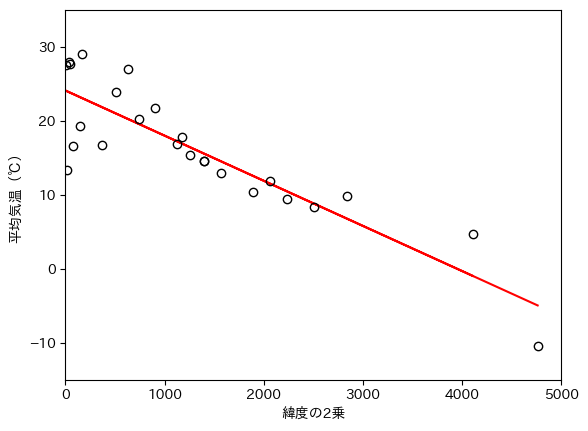

In [18]:
''' 平均気温と緯度の２乗の散布図 '''
fig, ax = plt.subplots()

# 最小二乗法による回帰直線
p = optimize.curve_fit(fit_func, D['L']**2, D['T'])[0]
print(p)
ax.plot(D['L']**2, fit_func(D['L']**2, p[0], p[1]), 'r-')

# 散布図
ax.plot(D['L']**2, D['T'], 'ko', mfc='None')
ax.set_xlim(0, 5000); ax.set_ylim(-15, 35)
ax.set_xlabel('緯度の2乗')
ax.set_ylabel('平均気温（℃）')
# fig.savefig('figure/lat2_temp.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

In [19]:
# 相関係数
np.corrcoef(D['L']**2, D['T'])

array([[ 1.    , -0.8771],
       [-0.8771,  1.    ]])

## STEP5: Conclusion
- 各都市の年間平均気温と緯度の関係を散布図によって調べた結果，緯度の２乗に対して直線関係があることが分かった．
- 一方，年間平均気温が緯度の2次関数になるということは，緯度が高くなれば気温もいくらでも大きくなることを意味し，やや奇妙である．

#### 実習
- 緯度$ \theta $における太陽エネルギーは$ \cos\theta $に比例することが知られている．これより，年間平均気温と緯度を結びつける，より適切な関数を求めよ．
- テイラー展開の観点から，2次関数の妥当性を議論せよ．

[ 44.3151 -19.9226]


Text(0, 0.5, '平均気温（℃）')

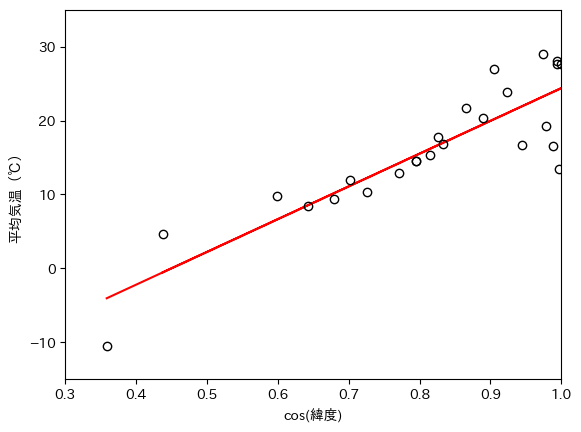

In [20]:
''' 平均気温とcos(緯度)の散布図 '''
fig, ax = plt.subplots()

# 最小二乗法による回帰直線
p = optimize.curve_fit(fit_func, np.cos(np.radians(D['L'])), D['T'])[0]
print(p)
ax.plot(np.cos(np.radians(D['L'])), fit_func(np.cos(np.radians(D['L'])), p[0], p[1]), 'r-')

# 散布図
ax.plot(np.cos(np.radians(D['L'])), D['T'], 'ko', mfc='None')
ax.set_xlim(0.3, 1); ax.set_ylim(-15, 35)
ax.set_xlabel('cos(緯度)')
ax.set_ylabel('平均気温（℃）')
# fig.savefig('figure/cos_lat_temp.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

In [21]:
# 相関係数
np.corrcoef(np.cos(np.radians(D['L'])), D['T'])

array([[1.    , 0.8743],
       [0.8743, 1.    ]])

## STEP 6: Problem 2
- 緯度の2乗と平均気温の散布図を見ると，直線関係から少し外れる都市がいくつかあることが分かる．
- これらの都市は，外れ値の大きい順にボコダ，メキシコ，アジスアベバ，である．
- では，これらの都市はなぜ直線関係から外れるのだろうか？

## STEP 7: Plan & Data 2
- 直線から外れている都市についてのデータを見ると，ある共通点が浮かび上がる．
- それは，標高が高いことである（いずれも標高2000m以上）．
- 一般的に，標高が高くなるほど都市の気温は低くなる．
- よって，平均気温と緯度の関係を見るためには，標高の影響を調整する必要がある．
- 一般に，標高が100m高くなると，気温は0.6℃低くなると言われている．
- これより，平均気温（$ T $）に対して標高（$ z $）の影響を調整した気温（高度調整済み平均気温）は
    $$ T_{0}=T+0.006z 
    $$
  と表される．

## STEP 8: Analysis 2

#### 実習
- 緯度の２乗，$\cos(緯度)$と高度調整済み平均気温の散布図を描け
- この散布図から相関係数を求めよ
- この散布図に対して回帰直線を引き，直線の式を求めよ

In [24]:
# 高度調整済み平均気温
D['T0'] = D['T'] + 0.006 * D['Z']

[-0.0071 27.6614]


Text(0, 0.5, '高度調整済み平均気温（℃）')

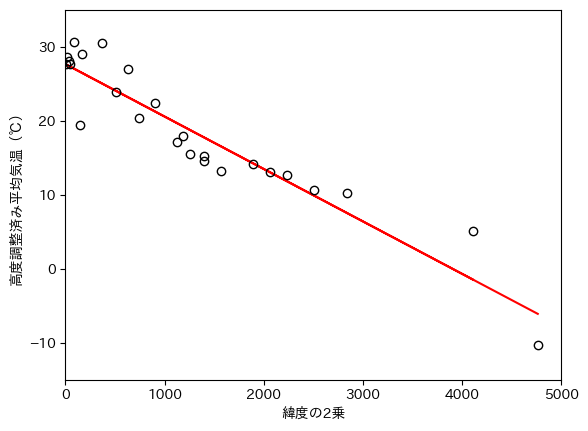

In [25]:
''' 高度調整済み平均気温と緯度の２乗の散布図 '''
fig, ax = plt.subplots()

# 最小二乗法による回帰直線
p = optimize.curve_fit(fit_func, D['L']**2, D['T0'])[0]
print(p)
ax.plot(D['L']**2, fit_func(D['L']**2, p[0], p[1]), 'r-')

# 散布図
ax.plot(D['L']**2, D['T0'], 'ko', mfc='None')
ax.set_xlim(0, 5000); ax.set_ylim(-15, 35)
ax.set_xlabel('緯度の2乗')
ax.set_ylabel('高度調整済み平均気温（℃）')
# fig.savefig('figure/lat2_temp0.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

In [26]:
# 相関係数
np.corrcoef(D['L']**2, D['T0'])

array([[ 1.    , -0.9432],
       [-0.9432,  1.    ]])

[ 51.6927 -23.6513]


Text(0, 0.5, '高度調整済み平均気温（℃）')

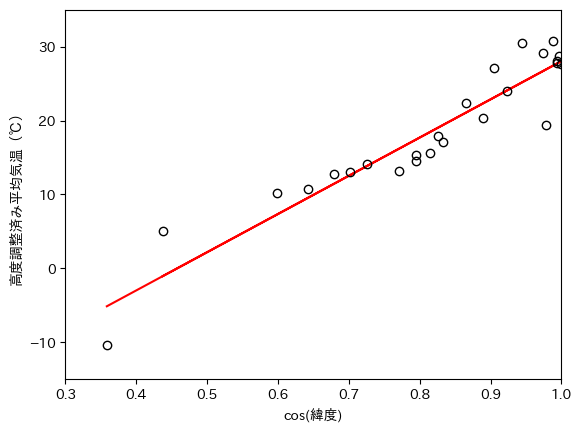

In [27]:
''' 高度調整済み平均気温とcos(緯度)の散布図 '''
fig, ax = plt.subplots()

# 最小二乗法による回帰直線
p = optimize.curve_fit(fit_func, np.cos(np.radians(D['L'])), D['T0'])[0]
print(p)
ax.plot(np.cos(np.radians(D['L'])), fit_func(np.cos(np.radians(D['L'])), p[0], p[1]), 'r-')

# 散布図
ax.plot(np.cos(np.radians(D['L'])), D['T0'], 'ko', mfc='None')
ax.set_xlim(0.3, 1); ax.set_ylim(-15, 35)
ax.set_xlabel('cos(緯度)')
ax.set_ylabel('高度調整済み平均気温（℃）')
# fig.savefig('figure/cos_lat_temp2.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

In [28]:
# 相関係数
np.corrcoef(np.cos(np.radians(D['L'])), D['T0'])

array([[1.    , 0.9439],
       [0.9439, 1.    ]])

## STEP 9: Conclusion 2
- 年間平均気温と緯度の2乗の関係において発生する外れ値は，標高の影響によるものであることが分かった．
- そこで，標高の影響を調整することで，年間平均気温，緯度，標高に対する適切な関数を推定することができた．